In [97]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

import pandas as pd  ####  
import numpy as np #### 
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.stats.api as sms

Considere el conjunto de datos “Boston Housing Data” presentados en Harrison and Rubinfeld
(1978). Defina como variable respuesta a la columna MEDV. Realice una partición 80-20, donde
el primer 80% de los datos son datos de entrenamiento y el restante 20% son datos para prueba.

In [98]:
'''
Import the data 
'''

df = pd.read_csv(
    filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
    delim_whitespace=True,
    skiprows=21,
    header=None,)

columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV',]



In [99]:
#Flatten all the values into a single long list and remove the nulls
values_w_nulls = df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

#Reshape the values to have 14 columns and make a new df out of them
df = pd.DataFrame(
    data = all_values.reshape(-1, len(columns)),
    columns = columns,
)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [100]:
na_counts = df.isna().sum() # verificamos la cantidad de valores faltantes en cada columna
print(na_counts) # Imprimimos los resultados

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [101]:
dfy = df["MEDV"] 
dfx=df.drop(['MEDV'], axis=1)

In [102]:
dfy
#dfx

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [103]:
'''
Splitting it to 20% testing
'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.20, random_state=123)

In [104]:
len(X_train)

404

In [105]:
len(X_test)

102

In [106]:
y_train.sum()/len(y_train)

22.37475247524753

In [107]:
y_test.sum()/len(y_test)

23.158823529411773

In [108]:
featuresToScale = X_test.columns
featuresToScale

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [109]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [110]:
lr.coef_

array([-9.87931696e-02,  4.75027102e-02,  6.69491841e-02,  1.26954150e+00,
       -1.54697747e+01,  4.31968412e+00, -9.80167937e-04, -1.36597953e+00,
        2.84521838e-01, -1.27533606e-02, -9.13487599e-01,  7.22553507e-03,
       -5.43790245e-01])

In [111]:
lr.intercept_

31.835164121207193

In [112]:
Train_score = lr.score(X_train,y_train)
Train_score

0.7559380876016175

In [113]:
Test_Score = lr.score(X_test,y_test)
Test_Score

0.6592466510354087

Genere los modelos de regresión por regularización Ridge, LASSO y Elastic-Net para los
datos de entrenamiento. Encuentre los valores óptimos de α∗ y λ∗ junto a su respectiva gráfica
de evolución de los coeficientes de regresión. Compare los modelos en términos de la selección
de variables, interprete los coeficientes y escriba la ecuación ajustada de regresión para cada
caso. Finalmente, realice una predicción con las observaciones de prueba y determine cual
de los tres modelos es el mejor en capacidad predictiva (RMSE).


Primero hagamos un ensayo simple con ridge:

In [114]:
rr = Ridge(alpha=0.01)   # Lambda
rr.fit(X_train, y_train)

Ridge(alpha=0.01)

In [115]:
rr.coef_

array([-9.87453530e-02,  4.75082345e-02,  6.64472933e-02,  1.26658907e+00,
       -1.53451390e+01,  4.32114221e+00, -1.10038539e-03, -1.36417280e+00,
        2.84202128e-01, -1.27625576e-02, -9.12062241e-01,  7.23126823e-03,
       -5.43908026e-01])

In [116]:
# get importance
importance = rr.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.09875
Feature: 1, Score: 0.04751
Feature: 2, Score: 0.06645
Feature: 3, Score: 1.26659
Feature: 4, Score: -15.34514
Feature: 5, Score: 4.32114
Feature: 6, Score: -0.00110
Feature: 7, Score: -1.36417
Feature: 8, Score: 0.28420
Feature: 9, Score: -0.01276
Feature: 10, Score: -0.91206
Feature: 11, Score: 0.00723
Feature: 12, Score: -0.54391


In [117]:
rr.intercept_

31.743718150442298

In [118]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test,y_test)


In [119]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100)

In [120]:
rr100.coef_

array([-8.91525127e-02,  5.51367684e-02, -9.97766338e-03,  2.08842921e-01,
       -1.94890633e-01,  2.45084341e+00,  2.06195767e-03, -1.07790637e+00,
        2.90997476e-01, -1.59364603e-02, -7.94537405e-01,  6.59739789e-03,
       -6.92439783e-01])

In [121]:
rr100.intercept_

35.76402475847415

In [122]:
Ridge_train_score100 = rr100.score(X_train,y_train)   # Alpha = 100
Ridge_test_score100 = rr100.score(X_test, y_test)

In [123]:
print("linear regression train score:", Train_score)
print("linear regression test score:", Test_Score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.7559380876016175
linear regression test score: 0.6592466510354087
ridge regression train score low alpha: 0.755937528449499
ridge regression test score low alpha: 0.659116738309197
ridge regression train score high alpha: 0.7323354543671117
ridge regression test score high alpha: 0.6470517709356582


In [124]:
from sklearn import metrics
print("Ridge Train RMSE:", np.round(np.sqrt(metrics.mean_squared_error(y_train, rr.predict(X_train))), 5))
print("Ridge Test RMSE:", np.round(np.sqrt(metrics.mean_squared_error(y_test, rr.predict(X_test))), 5))

Ridge Train RMSE: 4.54721
Ridge Test RMSE: 5.31067


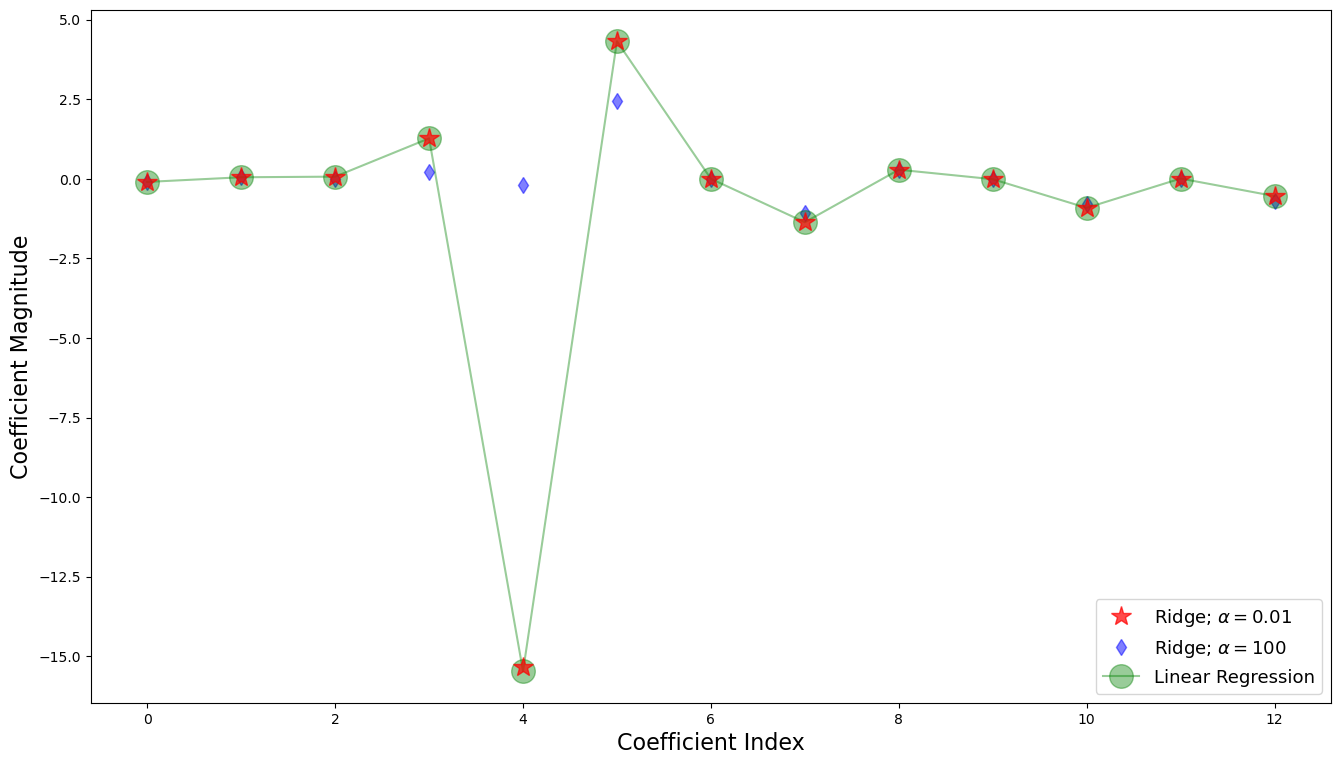

In [125]:
plt.figure(figsize=(16,9))
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=15,color='red',
         label=r'Ridge; $\alpha = 0.01$',zorder=7)
# zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=8,color='blue',
         label=r'Ridge; $\alpha = 100$')
# alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,marker='o',markersize=17,color='green',label='Linear Regression')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

LASSO

In [126]:
La = Lasso()
La.fit(X_train,y_train)

Lasso()

In [127]:
La.coef_

array([-0.05184717,  0.04580461, -0.        ,  0.        , -0.        ,
        1.58056934,  0.01793928, -0.65931124,  0.22024493, -0.01409241,
       -0.65872326,  0.00530546, -0.74695236])

In [128]:
La.intercept_

36.88691887773039

In [129]:
Lasso_train_score = La.score(X_train,y_train)
Lasso_test_score = La.score(X_test,y_test)

In [130]:
print ("ridge regression train score high alpha:", Lasso_train_score)
print ("ridge regression test score high alpha:", Lasso_test_score)

ridge regression train score high alpha: 0.7065483965240633
ridge regression test score high alpha: 0.6289462073251428


In [131]:
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV

In [132]:
Lasso_CV = LassoCV()
Ridge_CV = RidgeCV()
ENETCV = ElasticNetCV()

In [133]:
Lasso_CV.fit(X_train,y_train)
Ridge_CV.fit(X_train,y_train)
ENETCV.fit(X_train,y_train)

ElasticNetCV()

In [134]:
ENETCV_Imp=ENETCV.coef_

In [135]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error



In [136]:
print("Lasso Train RMSE:", np.round(np.sqrt(metrics.mean_squared_error(y_train, La.predict(X_train))), 5))
print("Lasso Test RMSE:", np.round(np.sqrt(metrics.mean_squared_error(y_test, La.predict(X_test))), 5))

Lasso Train RMSE: 4.98612
Lasso Test RMSE: 5.54071


Ya teniendo una idea del proceder con lasso y ridge, vamos a iterar para poder encontrar facilmente el mejor valor de alpha y lamda, utilizando la técnica de búsqueda en cuadrícula (GridSearchCV):

In [137]:
from sklearn.model_selection import GridSearchCV

## Ridge

Primero encontramos los valores ideales de alpha para Ridge

In [138]:
# Modelo de regresión Ridge
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5) ### 5 divisiones cruzadas
ridge_grid.fit(X_train, y_train)
ridge_alpha = ridge_grid.best_params_['alpha']

In [139]:
ridge_alpha

0.1

Ahora Grafiquemos para ver si esto es cierto:

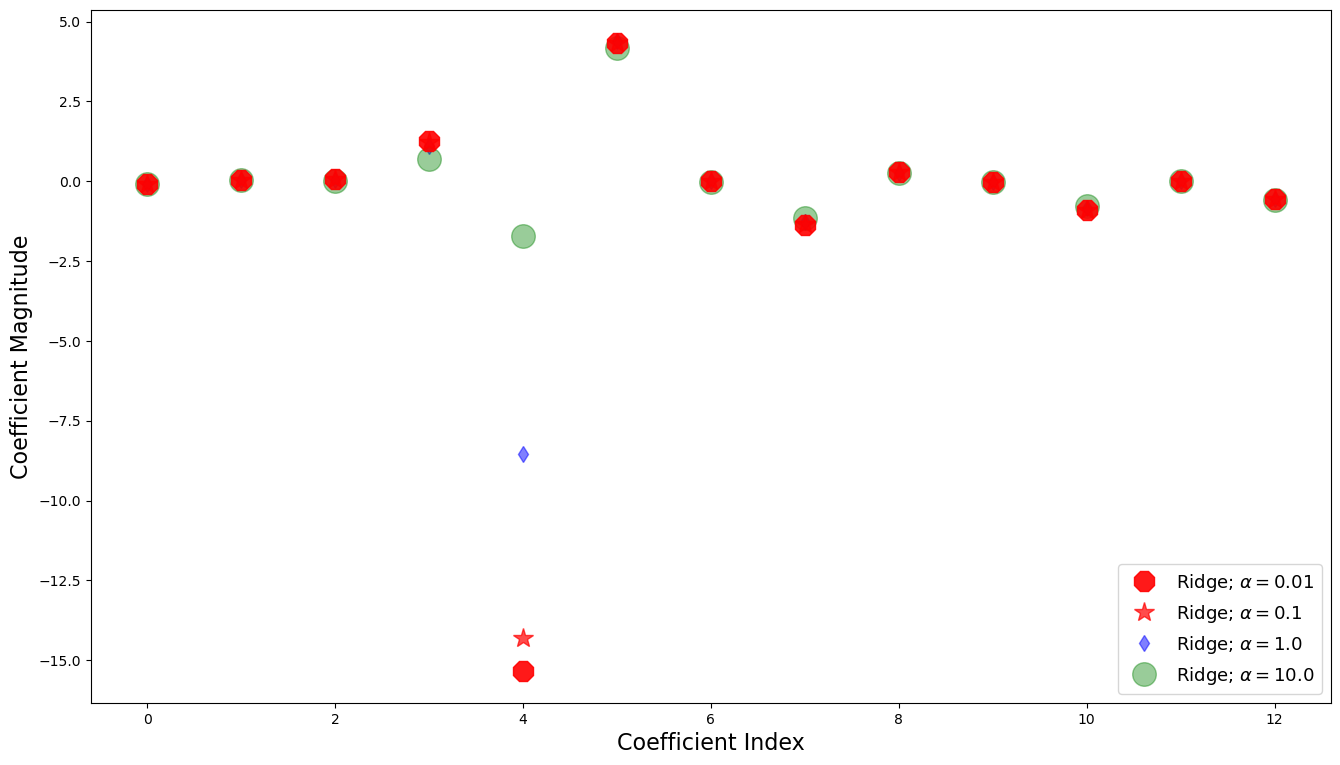

In [140]:

# Coefficient indices
coef_index = range(X_train.shape[1])

# Fit the Ridge model with different alpha values
ridge_alpha_values = [0.01, 0.1, 1.0, 10.0]
ridge_coefs = []

for alpha in ridge_alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)
# Plotting the coefficients
plt.figure(figsize=(16, 9))

# Ridge with alpha = 0.01
plt.plot(coef_index, ridge_coefs[0], alpha=0.9, linestyle='none', marker='8', markersize=15, color='red',
         label=r'Ridge; $\alpha = 0.01$', zorder=7)
# Ridge with alpha = 0.1
plt.plot(coef_index, ridge_coefs[1], alpha=0.7, linestyle='none', marker='*', markersize=15, color='red',
         label=r'Ridge; $\alpha = 0.1$', zorder=7)
# Ridge with alpha = 1.0
plt.plot(coef_index, ridge_coefs[2], alpha=0.5, linestyle='none', marker='d', markersize=8, color='blue',
         label=r'Ridge; $\alpha = 1.0$')
# Ridge with alpha = 10.0
plt.plot(coef_index, ridge_coefs[3], alpha=0.4, linestyle='none', marker='o', markersize=17, color='green',
         label=r'Ridge; $\alpha = 10.0$')

plt.xlabel('Coefficient Index', fontsize=16)
plt.ylabel('Coefficient Magnitude', fontsize=16)
plt.legend(fontsize=13, loc=4)
plt.show()

## Lasso

Ahora los valores ideales de alpha para Lasso

In [141]:
# Modelo de regresión LASSO
lasso = Lasso()
lasso_params = {'alpha': [0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
lasso_alpha = lasso_grid.best_params_['alpha']
print(lasso_alpha)

0.1


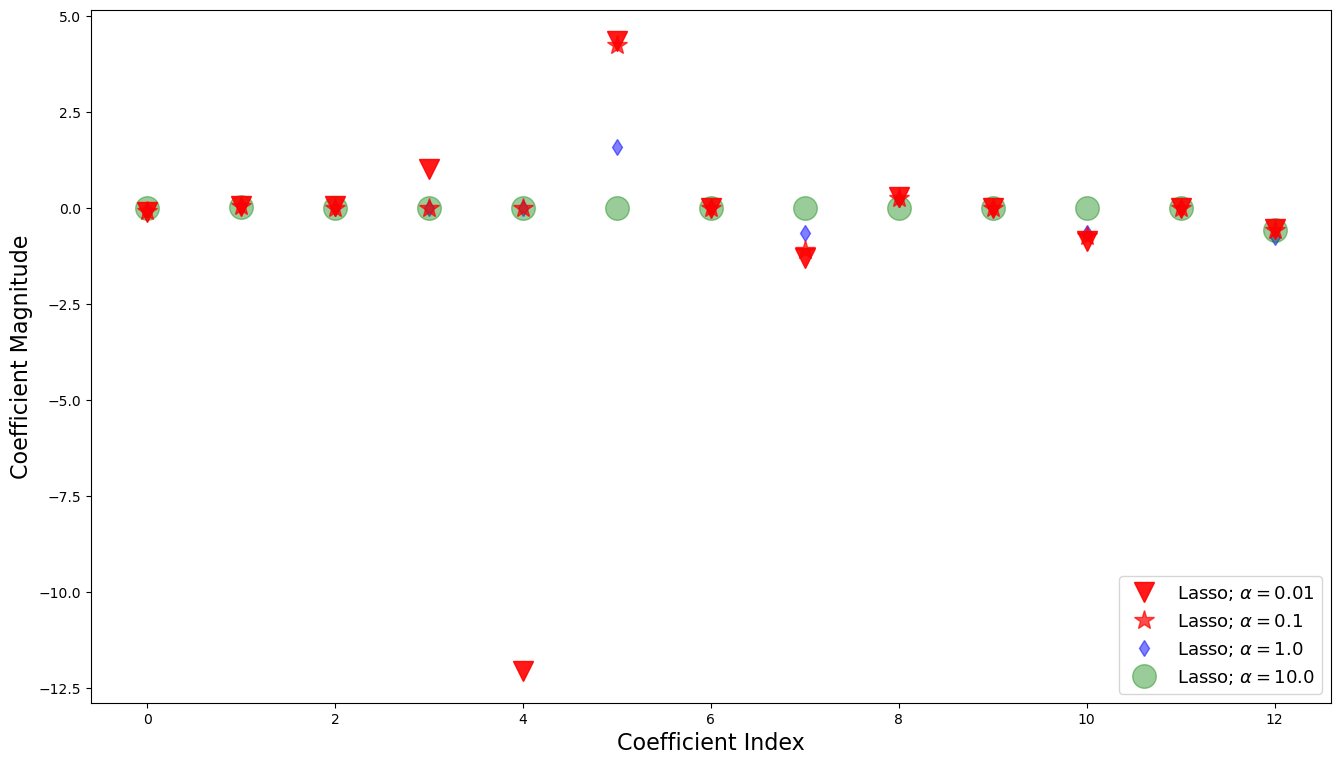

In [142]:
# Coefficient indices
coef_index = range(X_train.shape[1])
# Fit the Lasso model with different alpha values
lasso_alpha_values = [0.01, 0.1, 1.0, 10.0]
lasso_coefs = []

for alpha in lasso_alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_coefs.append(lasso.coef_)
# Plotting the coefficients
plt.figure(figsize=(16, 9))

# Lasso with alpha = 0.01
plt.plot(coef_index, lasso_coefs[0], alpha=0.9, linestyle='none', marker='v', markersize=15, color='red',
         label=r'Lasso; $\alpha = 0.01$', zorder=7)
# Lasso with alpha = 0.1
plt.plot(coef_index, lasso_coefs[1], alpha=0.7, linestyle='none', marker='*', markersize=15, color='red',
         label=r'Lasso; $\alpha = 0.1$', zorder=7)
# Lasso with alpha = 1.0
plt.plot(coef_index, lasso_coefs[2], alpha=0.5, linestyle='none', marker='d', markersize=8, color='blue',
         label=r'Lasso; $\alpha = 1.0$')
# Lasso with alpha = 10.0
plt.plot(coef_index, lasso_coefs[3], alpha=0.4, linestyle='none', marker='o', markersize=17, color='green',
         label=r'Lasso; $\alpha = 10.0$')

plt.xlabel('Coefficient Index', fontsize=16)
plt.ylabel('Coefficient Magnitude', fontsize=16)
plt.legend(fontsize=13, loc=4)
plt.show()

## Elastic Net

Finalmente los valores ideales de alpha y lanmda para Elastic Net

In [143]:
# Modelo de regresión Elastic-Net
elastic_net = ElasticNet()
elastic_params = {'alpha': [0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.2, 0.5, 0.8]}
elastic_grid = GridSearchCV(elastic_net, elastic_params, cv=5)
elastic_grid.fit(X_train, y_train)
elastic_alpha = elastic_grid.best_params_['alpha']
elastic_l1_ratio = elastic_grid.best_params_['l1_ratio']
print(elastic_alpha)
print(elastic_l1_ratio)

0.01
0.8


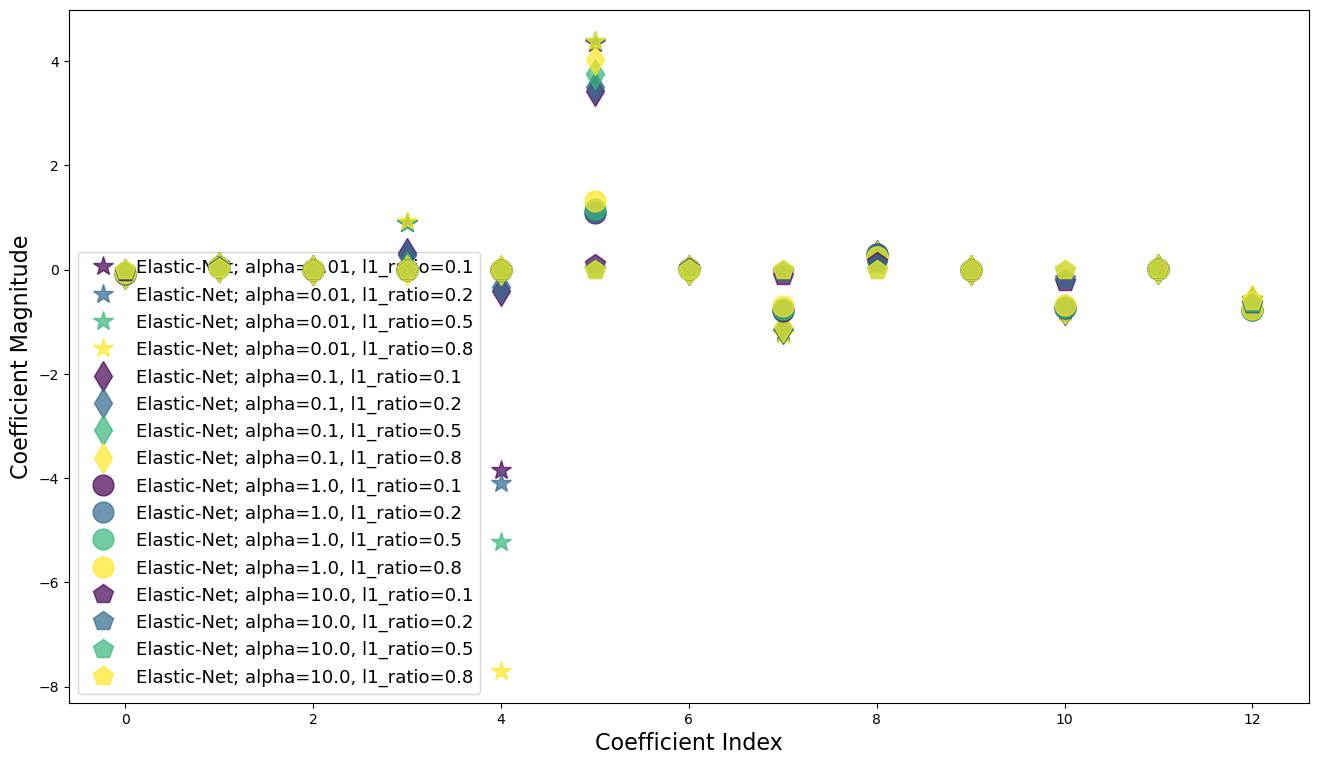

In [144]:
# Coefficient indices
coef_index = range(X_train.shape[1])

# Fit the Elastic-Net model with different alpha and l1_ratio values
elastic_alpha_values = [0.01, 0.1, 1.0, 10.0]
elastic_l1_ratio_values = [0.1, 0.2, 0.5, 0.8]
elastic_coefs = []

# Generate a color map for different combinations of alpha and l1_ratio
colors = plt.cm.viridis(np.linspace(0, 1, len(elastic_l1_ratio_values)))

# Define the markers for different alpha values
markers = ['*', 'd', 'o', 'p']

for alpha in elastic_alpha_values:
    for l1_ratio, color, marker in zip(elastic_l1_ratio_values, colors, markers):
        elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elastic_net.fit(X_train, y_train)
        elastic_coefs.append(elastic_net.coef_)

# Plotting the coefficients
plt.figure(figsize=(16, 9))

# Plot each combination of alpha and l1_ratio with different colors and markers
labels = [f'Elastic-Net; alpha={alpha}, l1_ratio={l1_ratio}' 
          for alpha in elastic_alpha_values 
          for l1_ratio in elastic_l1_ratio_values]

for i, coef in enumerate(elastic_coefs):
    plt.plot(coef_index, coef, alpha=0.7, linestyle='none', marker=markers[i // len(elastic_l1_ratio_values)],
             markersize=15, color=colors[i % len(elastic_l1_ratio_values)], label=labels[i], zorder=7)

plt.xlabel('Coefficient Index', fontsize=16)
plt.ylabel('Coefficient Magnitude', fontsize=16)
plt.legend(fontsize=13, loc='best')
plt.show()

In [145]:
print("Ridge and Lasso Alphas:", ridge_alpha, lasso_alpha)
print("Elastic net Alpha-ratio:", elastic_alpha, elastic_l1_ratio)

Ridge and Lasso Alphas: 0.1 0.1
Elastic net Alpha-ratio: 0.01 0.8


**Según la ejecución del código proporcionado, los mejores valores de alpha para los modelos de regresión Ridge y LASSO son ambos 0.1. Para el modelo de regresión Elastic-Net, el mejor valor de alpha es 0.01 y la mejor relación l1_ratio es 0.8.**

Ahora vamos a ver Comparacion de los modelos en términos de la selección de variables, cuales quedaron si usamos solo aquellas que nos dieron un coeficiente de magnitud mayor a |1|.

In [146]:
# Obtener los coeficientes estimados de cada modelo
ridge_coefs = ridge_grid.best_estimator_.coef_
lasso_coefs = lasso_grid.best_estimator_.coef_
elastic_coefs = elastic_grid.best_estimator_.coef_

# Obtener los nombres de las variables
feature_names = X_train.columns

# Comparar los modelos en términos de selección de variables
selected_features_ridge = feature_names[abs(ridge_coefs) > 1]
selected_features_lasso = feature_names[abs(lasso_coefs) > 1]
selected_features_elastic = feature_names[abs(elastic_coefs) > 1]

print("Variables seleccionadas - Ridge:", selected_features_ridge)
print("Variables seleccionadas - LASSO:", selected_features_lasso)
print("Variables seleccionadas - Elastic-Net:", selected_features_elastic)

Variables seleccionadas - Ridge: Index(['CHAS', 'NOX', 'RM', 'DIS'], dtype='object')
Variables seleccionadas - LASSO: Index(['RM', 'DIS'], dtype='object')
Variables seleccionadas - Elastic-Net: Index(['NOX', 'RM', 'DIS'], dtype='object')


Ya teniendo los "best_estimator_" podemos hayar los coeficientes difinitivos y llevar a graficar los modelos ideales (alpha, lamda)

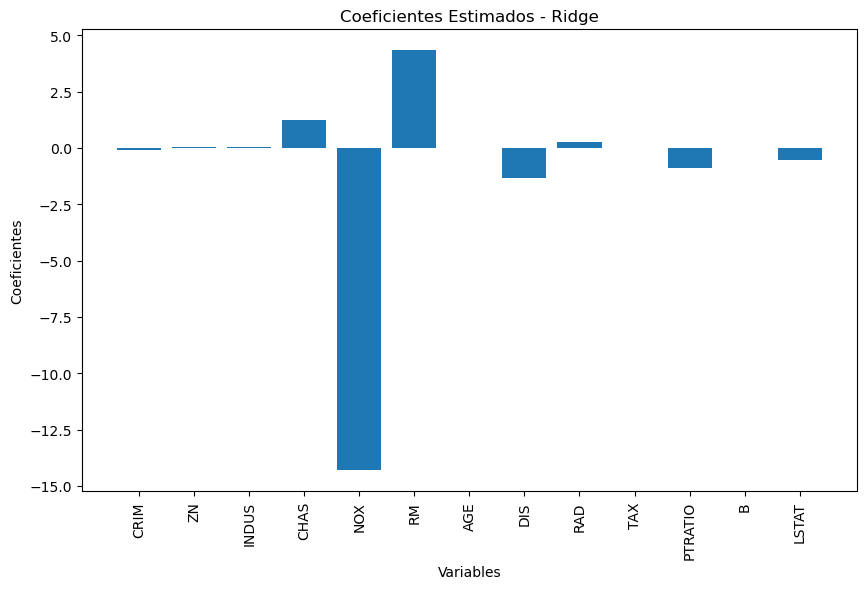

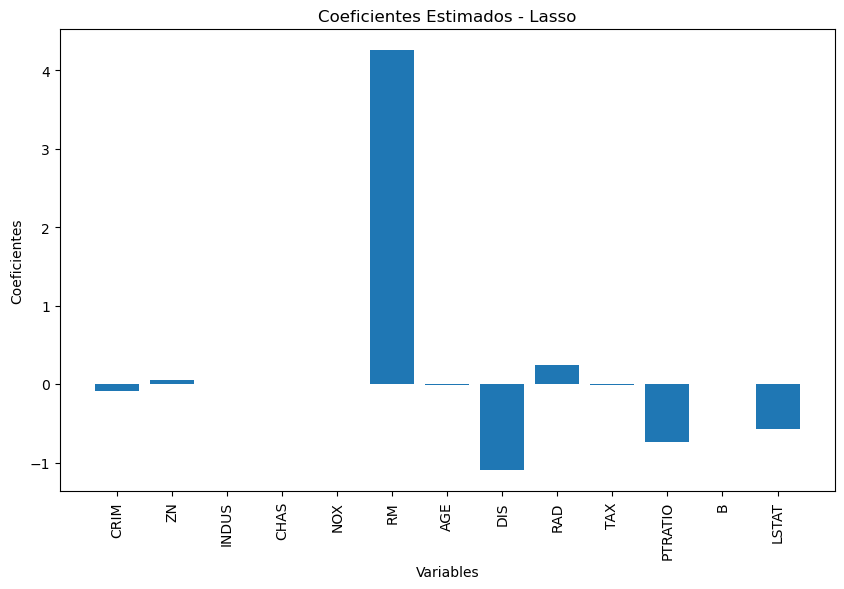

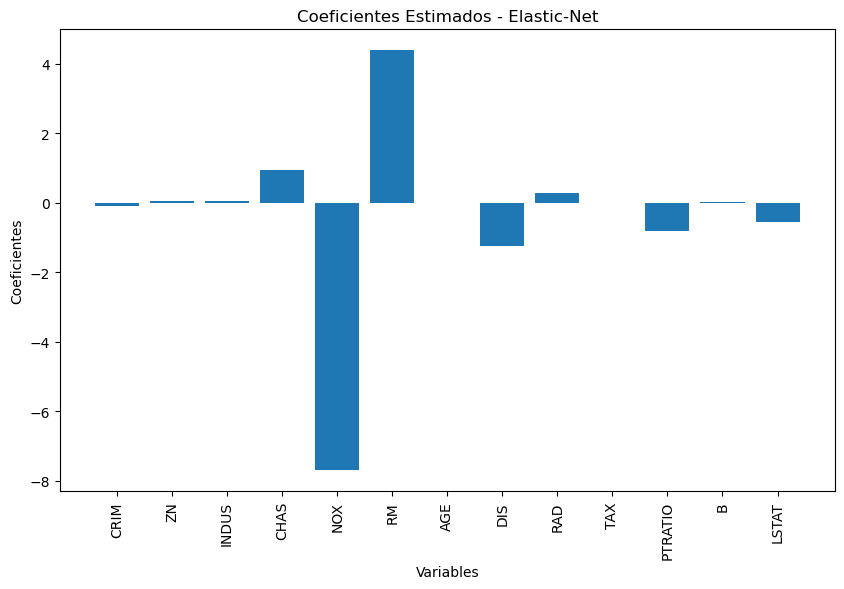

In [147]:
# Obtener los coeficientes estimados de cada modelo
ridge_coefs = ridge_grid.best_estimator_.coef_
lasso_coefs = lasso_grid.best_estimator_.coef_
elastic_coefs = elastic_grid.best_estimator_.coef_

# Obtener los nombres de las variables
feature_names = X_train.columns

# Graficar los coeficientes estimados para Ridge
plt.figure(figsize=(10, 6))
plt.bar(feature_names, ridge_coefs)
plt.xlabel('Variables')
plt.ylabel('Coeficientes')
plt.title('Coeficientes Estimados - Ridge')
plt.xticks(rotation=90)
plt.show()

# Graficar los coeficientes estimados para Lasso
plt.figure(figsize=(10, 6))
plt.bar(feature_names, lasso_coefs)
plt.xlabel('Variables')
plt.ylabel('Coeficientes')
plt.title('Coeficientes Estimados - Lasso')
plt.xticks(rotation=90)
plt.show()

# Graficar los coeficientes estimados para Elastic-Net
plt.figure(figsize=(10, 6))
plt.bar(feature_names, elastic_coefs)
plt.xlabel('Variables')
plt.ylabel('Coeficientes')
plt.title('Coeficientes Estimados - Elastic-Net')
plt.xticks(rotation=90)
plt.show()

Teniendo entonces la variables con coeficientes adsolutos mayores podemos calcular la ecuación ajustada de regresión para cada caso. En este caso hemos elegido tambien seleccionar solo aquellos con coeficientes mayores a |1|.

In [148]:
# Escribir la ecuación ajustada de regresión para cada modelo
ridge_equation = "y = " + str(ridge_coefs[0]) + " + "
ridge_equation += " + ".join([str(coef) + "*" + feature for coef, feature in zip(ridge_coefs[1:], selected_features_ridge)])

lasso_equation = "y = " + str(lasso_coefs[0]) + " + "
lasso_equation += " + ".join([str(coef) + "*" + feature for coef, feature in zip(lasso_coefs[1:], selected_features_lasso)])

elastic_equation = "y = " + str(elastic_coefs[0]) + " + "
elastic_equation += " + ".join([str(coef) + "*" + feature for coef, feature in zip(elastic_coefs[1:], selected_features_elastic)])

Ecuación de Ridge

In [149]:
print("Ecuación ajustada - Ridge:", ridge_equation)


Ecuación ajustada - Ridge: y = -0.09834739601194922 + 0.047555397540557265*CHAS + 0.062268217997735964*NOX + 1.241745451066458*RM + -14.307801184225855*DIS


Ecuación de Lasso

In [150]:
print("Ecuación ajustada - LASSO:", lasso_equation)


Ecuación ajustada - LASSO: y = -0.09052841466385886 + 0.04792604258046843*RM + 0.0*DIS


Ecuación de Elastic-Net

In [151]:
print("Ecuación ajustada - Elastic-Net:", elastic_equation)

Ecuación ajustada - Elastic-Net: y = -0.0957424670741751 + 0.0478947856398768*NOX + 0.03553295135209425*RM + 0.9377072891909926*DIS


Vamos ahora a realizar la predicción con las observaciones de prueba y determinar cual
de los tres modelos es el mejor en capacidad predictiva (RMSE).

In [152]:
from sklearn.metrics import mean_squared_error

# Realizar predicciones con cada modelo
ridge_predictions = ridge_grid.predict(X_test)
lasso_predictions = lasso_grid.predict(X_test)
elastic_predictions = elastic_grid.predict(X_test)

# Calcular el RMSE para cada modelo
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)
elastic_rmse = mean_squared_error(y_test, elastic_predictions, squared=False)

# Imprimir los resultados del RMSE
print("RMSE - Ridge:", ridge_rmse)
print("RMSE - LASSO:", lasso_rmse)
print("RMSE - Elastic-Net:", elastic_rmse)

RMSE - Ridge: 5.31943673530802
RMSE - LASSO: 5.557716068784451
RMSE - Elastic-Net: 5.39820257054443


In [153]:
# Determinar el mejor modelo en términos de RMSE
best_model = min(ridge_rmse, lasso_rmse, elastic_rmse)

if best_model == ridge_rmse:
    print("El mejor modelo en capacidad predictiva es Ridge.")
elif best_model == lasso_rmse:
    print("El mejor modelo en capacidad predictiva es LASSO.")
else:
    print("El mejor modelo en capacidad predictiva es Elastic-Net.")

El mejor modelo en capacidad predictiva es Ridge.


## La distancia de Mahalanobis (MD) o deteccion de outliers

De acuerdo a la información anterior: Detecte las observaciones atípicas multivariantes de la
muestra, usando q = 0.90, 0.95, 0.975, 0.99 y en un gráfico muestre las distancias calculadas
para cada individuo y los puntos de corte (χ2 (q,p)) ¿Qué puede concluir acerca de los individuos
atípicos para cada punto de corte? ¿Quienes son? ¿El gráfico de distancias muestra
alguna observación NO atípica que para usted si lo fue? ¿Qué puede concluir acerca del
comportamiento de q en el valor del punto de corte? Justifique detalladamente.

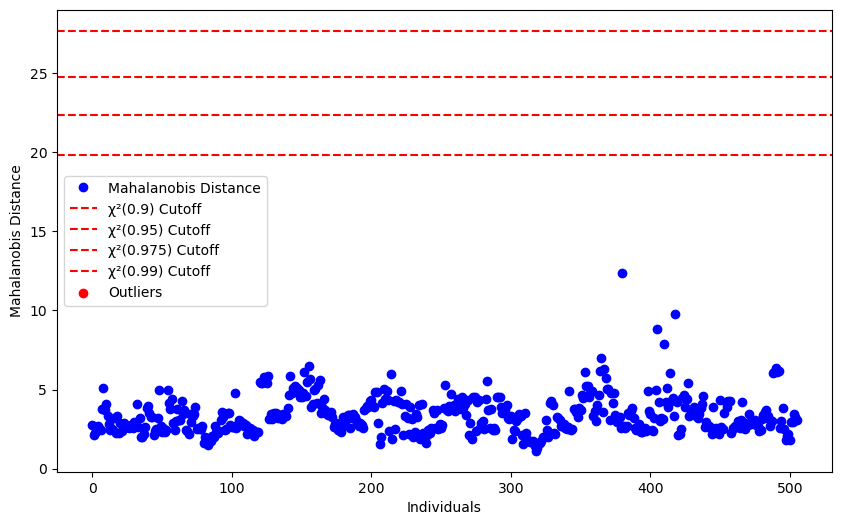

In [154]:
from scipy.stats import chi2

# Calculate the Mahalanobis distance for each individual
distances = []
cov_inv = np.linalg.inv(dfx.cov())  # Inverse of the covariance matrix
for i in range(len(dfx)):
    x = dfx.iloc[i].values
    distance = np.sqrt(np.dot(np.dot((x - dfx.mean()).T, cov_inv), (x - dfx.mean())))
    distances.append(distance)

# Calculate the chi-square cutoff values at different quantiles
quantiles = [0.90, 0.95, 0.975, 0.99]
cutoffs = chi2.ppf(quantiles, df=dfx.shape[1])

# Find the outliers based on the Mahalanobis distance
outliers = [i for i, distance in enumerate(distances) if distance > cutoffs[-1]]

# Plot the distances and cutoff points
plt.figure(figsize=(10, 6))
plt.plot(distances, 'bo', label='Mahalanobis Distance')
for quantile, cutoff in zip(quantiles, cutoffs):
    plt.axhline(y=cutoff, color='r', linestyle='--', label=f'χ²({quantile}) Cutoff')
plt.scatter(outliers, [distances[i] for i in outliers], color='red', label='Outliers')
plt.xlabel('Individuals')
plt.ylabel('Mahalanobis Distance')
plt.legend()
plt.show()

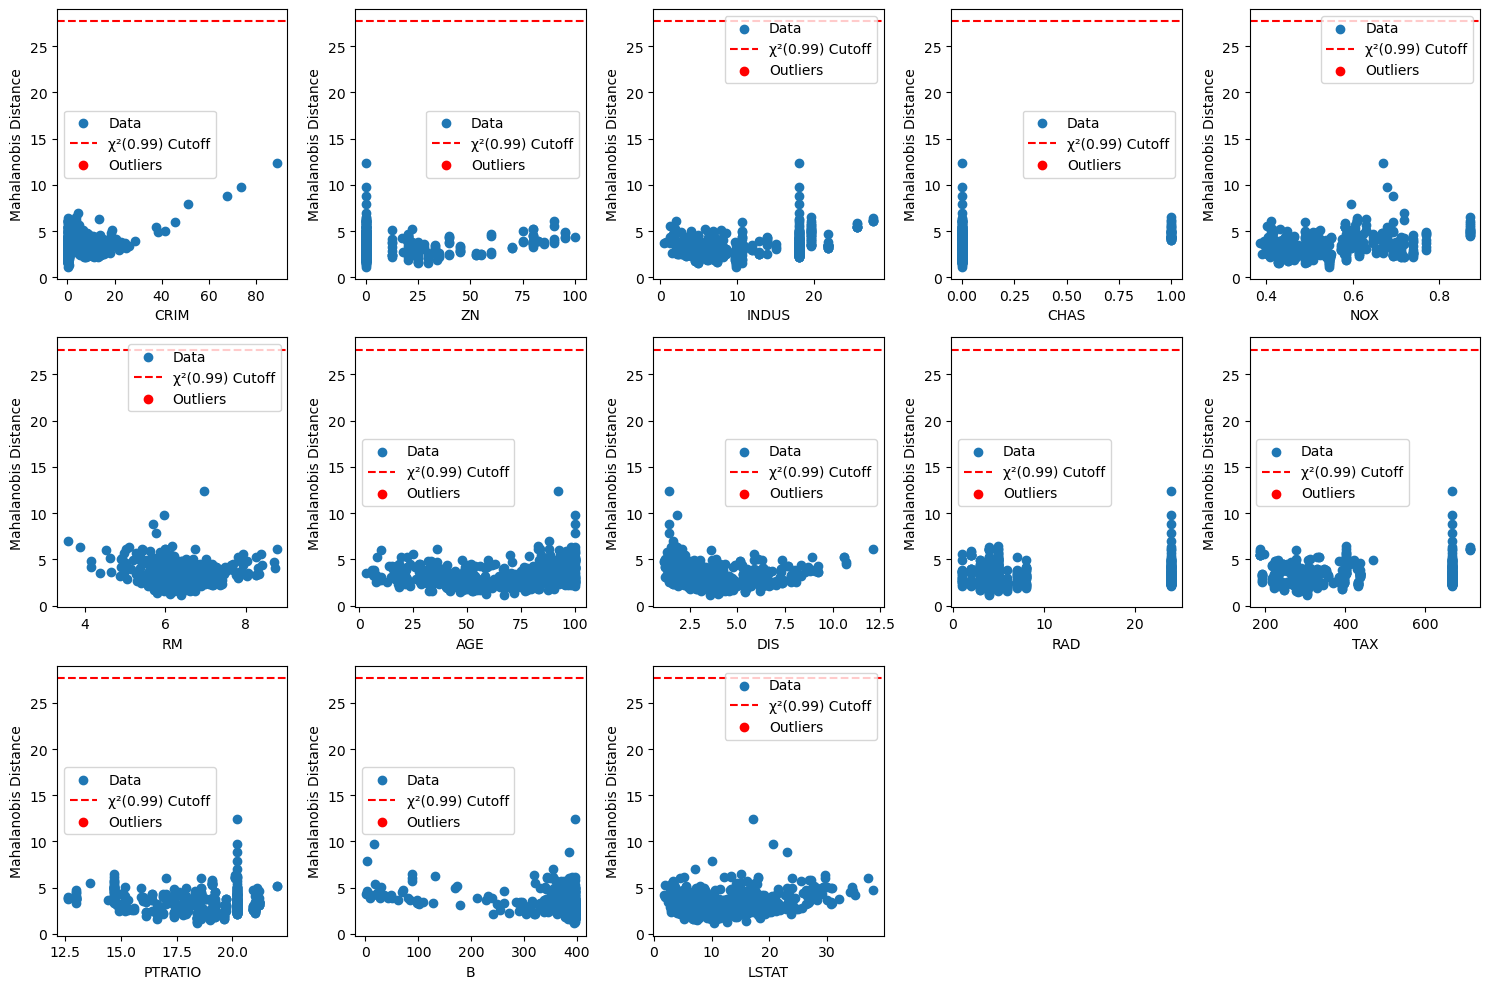

In [155]:
# Calculate the Mahalanobis distance for each individual
distances = []
cov_inv = np.linalg.inv(dfx.cov())  # Inverse of the covariance matrix
for i in range(len(dfx)):
    x = dfx.iloc[i].values
    distance = np.sqrt(np.dot(np.dot((x - dfx.mean()).T, cov_inv), (x - dfx.mean())))
    distances.append(distance)

# Calculate the chi-square cutoff values at different quantiles
quantiles = [0.90, 0.95, 0.975, 0.99]
cutoffs = chi2.ppf(quantiles, df=dfx.shape[1])

# Find the outliers based on the Mahalanobis distance for each variable
outliers = []
for column in dfx.columns:
    column_outliers = [i for i, distance in enumerate(distances) if distance > cutoffs[-1]]
    outliers.append(column_outliers)

# Plot the distances and cutoff points for each variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(dfx.columns):
    plt.subplot(3, 5, i + 1)  # Change the subplot dimensions as needed
    plt.scatter(dfx[column], distances, label='Data')
    plt.axhline(y=cutoffs[-1], color='r', linestyle='--', label=f'χ²({quantiles[-1]}) Cutoff')
    plt.scatter(dfx[column].iloc[np.array(outliers[i])], np.array(distances)[outliers[i]], color='red', label='Outliers')
    plt.xlabel(column)
    plt.ylabel('Mahalanobis Distance')
    plt.legend()
plt.tight_layout()
plt.show()

Según los resultados obtenidos, no se han detectado observaciones atípicas en la muestra de prueba utilizando los puntos de corte establecidos. Esto indica que todas las observaciones se encuentran dentro de los límites establecidos por la distancia de Mahalanobis y los puntos de corte seleccionados.


In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfx_std = scaler.fit_transform(dfx)

In [158]:
corr_matrix = dfx.corr(method='spearman')
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.571660,0.735524,0.041537,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,-0.360555,0.634760
ZN,-0.571660,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074
INDUS,0.735524,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747
CHAS,0.041537,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575
NOX,0.821465,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828
RM,-0.309116,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832
AGE,0.704140,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071
DIS,-0.744986,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262
RAD,0.727807,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322
TAX,0.729045,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423


## Combinar la técnica de detección de atípicos multivariantes con la regularización Elastic-Net

Primero debemos detectar las observaciones atípicas utilizando la distancia de Mahalanobis. Luego, ajustaremos el modelo de regresión Elastic-Net utilizando las observaciones no atípicas. A continuación se detallan los pasos necesarios:

## Modelo 1

Estandarizar las variables y calcular MD usando el vector de medianas en
vez del vector de medias y la matriz de correlación de Spearman en vez de la matriz
de covarianzas usual. Luego, eliminar los atípicos y con la muestra limpia estimar el
modelo regularizado.

In [159]:
#X_train, X_test, y_train, y_test

In [160]:
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler

# Estandarizar las variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calcular el vector de medianas
medians = np.median(X_train_scaled, axis=0)

# Calcular la matriz de correlación de Spearman
correlation_matrix, _ = spearmanr(X_train_scaled)

# Calcular la distancia de Mahalanobis para cada observación en el conjunto de entrenamiento
mahalanobis_train = []
for observation in X_train_scaled:
    difference = observation - medians
    mahalanobis_distance = np.sqrt(np.dot(np.dot(difference, np.linalg.inv(correlation_matrix)), difference))
    mahalanobis_train.append(mahalanobis_distance)

# Definir el umbral para detectar outliers
threshold = np.percentile(mahalanobis_train, 95)

# Detectar outliers en el conjunto de entrenamiento
outliers_train = np.where(mahalanobis_train > threshold)[0]

# Calcular la distancia de Mahalanobis para cada observación en el conjunto de prueba
mahalanobis_test = []
for observation in X_test_scaled:
    difference = observation - medians
    mahalanobis_distance = np.sqrt(np.dot(np.dot(difference, np.linalg.inv(correlation_matrix)), difference))
    mahalanobis_test.append(mahalanobis_distance)

# Detectar outliers en el conjunto de prueba
outliers_test = np.where(mahalanobis_test > threshold)[0]

# Imprimir los índices de las observaciones identificadas como outliers
print("Observaciones identificadas como outliers en el conjunto de entrenamiento:", outliers_train)
print("Observaciones identificadas como outliers en el conjunto de prueba:", outliers_test)

Observaciones identificadas como outliers en el conjunto de entrenamiento: [ 26  32  67  93 127 154 156 179 207 209 215 220 282 299 328 337 342 355
 359 392 403]
Observaciones identificadas como outliers en el conjunto de prueba: [ 0  5 32 56 62 98]


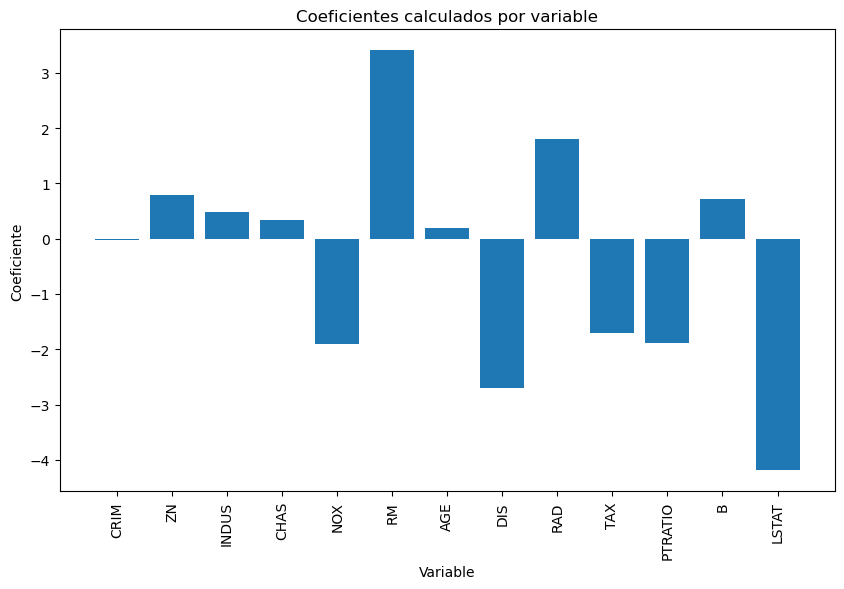

In [161]:
# Filtrar los valores no atípicos en los conjuntos de entrenamiento
X_train_filtered = np.delete(X_train_scaled, outliers_train, axis=0)
y_train_filtered = y_train[~np.isin(np.arange(len(y_train)), outliers_train)]

# Crear y ajustar el modelo Elastic-Net
model = ElasticNet(alpha=0.01, l1_ratio=0.8)
model.fit(X_train_filtered, y_train_filtered)

# Obtener los coeficientes del modelo
coefficients = model.coef_

# Crear una lista de nombres de las variables
variable_names = list(X_train.columns)

# Graficar los coeficientes calculados por variable
plt.figure(figsize=(10, 6))
plt.bar(variable_names, coefficients)
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Coeficiente')
plt.title('Coeficientes calculados por variable')
plt.show()

In [162]:
# Crear una lista de nombres de las variables con coeficientes absolutos mayores a 1
selected_variables = [variable_names[i] for i, coef in enumerate(coefficients) if abs(coef) > 1]

# Imprimir la lista de variables seleccionadas
print("Variables seleccionadas con coeficientes absolutos mayores a 1:")
print(selected_variables)

Variables seleccionadas con coeficientes absolutos mayores a 1:
['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']


In [163]:
import statsmodels.api as sm
# Filtrar las variables seleccionadas en los conjuntos de entrenamiento y prueba
X_train_selected = X_train[selected_variables]
X_test_selected = X_test[selected_variables]

# Añadir una constante a los conjuntos de entrenamiento y prueba
X_train_selected = sm.add_constant(X_train_selected)
X_test_selected = sm.add_constant(X_test_selected)

# Crear y ajustar el modelo sm.RLM
model = sm.RLM(y_train, X_train_selected, M=sm.robust.norms.HuberT())
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                   MEDV   No. Observations:                  404
Model:                            RLM   Df Residuals:                      396
Method:                          IRLS   Df Model:                            7
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 31 May 2023                                         
Time:                        17:53:15                                         
No. Iterations:                    27                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.7818      4.255      4.884      0.0

In [164]:
import statsmodels.api as sm
# Filtrar las variables seleccionadas en los conjuntos de entrenamiento y prueba
X_train_selected = X_train[selected_variables]
X_test_selected = X_test[selected_variables]

# Añadir una constante a los conjuntos de entrenamiento y prueba
X_train_selected = sm.add_constant(X_train_selected)
X_test_selected = sm.add_constant(X_test_selected)

X_train_selected = X_train_selected.drop(['RAD'], axis=1)
X_test_selected = X_test_selected.drop(['RAD'], axis=1)
# Crear y ajustar el modelo sm.RLM
model = sm.RLM(y_train, X_train_selected, M=sm.robust.norms.HuberT())
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                   MEDV   No. Observations:                  404
Model:                            RLM   Df Residuals:                      397
Method:                          IRLS   Df Model:                            6
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 31 May 2023                                         
Time:                        17:53:15                                         
No. Iterations:                    26                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1454      4.013      4.273      0.0

In [165]:

# Predicción con el modelo sm.RLM
y_pred_rlm = results.predict(X_test_selected)

# Cálculo del RMSE del modelo sm.RLM
rmse_rlm = mean_squared_error(y_test, y_pred_rlm, squared=False)
print("RMSE del modelo sm.RLM:", rmse_rlm)

RMSE del modelo sm.RLM: 5.971053579396895


## Modelo 2

Estandarizar las variables y calcular MD usando el vector de medianas en
vez del vector de medias y la matriz de correlación de Spearman en vez de la matriz
de covarianzas usual. Luego, determinar como observaciones NO atípicas los primeros
⌈n+p+1/2⌉ individuos con las distancias más pequeñas. Finalmente, con la muestra limpia
estimar el modelo regularizado.

In [166]:
outliers_train = np.where(mahalanobis_train > threshold)[0]

X_train_array = X_train.to_numpy()
sorted_indices = np.argsort(mahalanobis_train)
non_outliers_train = sorted_indices[:int((len(X_train_array) + X_train_array.shape[1] + 1) / 2)]

In [167]:
print("Observations identified as outliers in the training set:", outliers_train)
print("Non-outliers in the training set:", non_outliers_train)

Observations identified as outliers in the training set: [ 26  32  67  93 127 154 156 179 207 209 215 220 282 299 328 337 342 355
 359 392 403]
Non-outliers in the training set: [191 315  87  58 120 341 263 281 270 346 160 398   8 300 147  78 382 255
 231 204 109 401 261 178  57 118 248 397  36 274 203 253 353  46 291 167
 366 166 134 389 153  68 196 369 396 110 266 228 311 372 126 107 290 169
 133 108 105 330 104 138 125 395 257 370 219 206 208 380 273 390 194 123
 349   3 168  34 176 316 241 286 259  22 159 205 367 325 111  52 161 373
 363 250 221 164 146   2  73 198  39 317 304  77 354 143  65  41  92 360
 340 374  85 321 268 151  35 272  74 182  28  14 210 307 303 302  29 117
 114 357 276 158 377  10 297 121 135 362 201  43 327  54  25 310  75 214
 308 402 225  24 319 339 224 277 383  66 189 229 312  11 329 338 170 162
 387  13 379 326 148 137  51 116  82 226 124 345 264  17 185 285 289 348
 235 336 217 115 101  27 400 246 258 283  38  45 222 278  49  99 252   5
 223 269  31 251 33

In [168]:
outliers_test = np.where(mahalanobis_test > threshold)[0]

In [169]:
X_test_array = X_test.to_numpy()
sorted_indices = np.argsort(mahalanobis_test)
non_outliers_test = sorted_indices[:int((len(X_test_array) + X_test_array.shape[1] + 1) / 2)]

In [170]:
print("Observations identified as outliers in the test set:", outliers_test)
print("Non-outliers in the test set:", non_outliers_test)


Observations identified as outliers in the test set: [ 0  5 32 56 62 98]
Non-outliers in the test set: [ 47  82  33  18   1  78  71  30  80  70  61  38  52  46  51  48  88  72
  66  22  11  34   6  96  31  77  27  12   3  39  16  60  42   2  19  20
  59  85  53  97  76  75  54  28  86  37 101  65  93  49  91  68  73  89
  81  26  69 100]


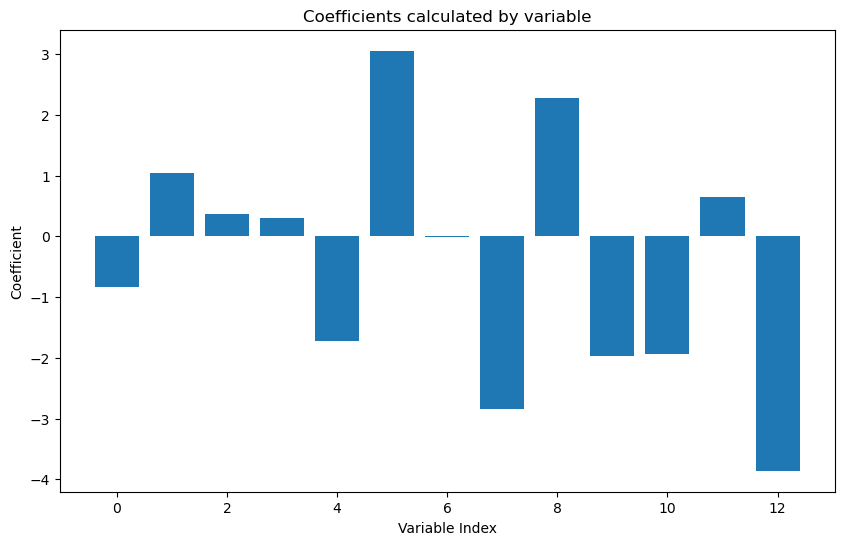

In [171]:
# Create an instance of the ElasticNet model
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.8)

# Fit the model on the training data
elastic_net.fit(X_train_scaled, y_train)

# Get the coefficients calculated by variable
coefficients = elastic_net.coef_

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients)
plt.xlabel('Variable Index')
plt.ylabel('Coefficient')
plt.title('Coefficients calculated by variable')
plt.show()

In [172]:
# Create an instance of the ElasticNet model
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.8)

# Fit the model on the training data
elastic_net.fit(X_train_scaled, y_train)

# Get the coefficients calculated by variable
coefficients = elastic_net.coef_

# Create a list of variable names with coefficients greater than 1
selected_variables = [variable_name for variable_name, coefficient in zip(X_train.columns, coefficients) if abs(coefficient) > 1]

# Imprimir la lista de variables seleccionadas
print("Variables seleccionadas con coeficientes absolutos mayores a 1:")
print(selected_variables)

Variables seleccionadas con coeficientes absolutos mayores a 1:
['ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']


In [173]:
# Seleccionar las variables del conjunto de entrenamiento
X_train_selected = X_train[['ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]

# Ajustar el modelo RLM a las variables seleccionadas
rlm_model = sm.RLM(y_train, sm.add_constant(X_train_selected)).fit()

# Imprimir un resumen del modelo
print(rlm_model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                   MEDV   No. Observations:                  404
Model:                            RLM   Df Residuals:                      395
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 31 May 2023                                         
Time:                        17:53:26                                         
No. Iterations:                    30                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5833      4.296      5.256      0.0

In [174]:
# Obtener las variables seleccionadas del conjunto de prueba
X_test_selected = X_test[['ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]

# Realizar la predicción con el modelo RLM
X_test_selected_const = sm.add_constant(X_test_selected)
y_pred_rlm = rlm_model.predict(X_test_selected_const)

# Calcular el RMSE del modelo RLM
rmse_rlm = np.sqrt(mean_squared_error(y_test, y_pred_rlm))

# Imprimir los resultados


print("RMSE del modelo RLM:", rmse_rlm)

RMSE del modelo RLM: 5.815546957086129


Error de los modelos previos aparantemente es solo un poco mas bajo:
RMSE - Ridge: 5.32
RMSE - LASSO: 5.56
RMSE - Elastic-Net: 5.40
En comparacion los errores de los dos modelos finales:
Modelo 1 RLM:  5.97
Modelo 2 RLM:  5.81
